In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
file_path = '/content/products.csv'
df = pd.read_csv(file_path)

In [ ]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   id                          names  price  feedback_text
0   1                   Black Coffee  24.53            NaN
1   2  Butter Chicken Grilled Burger   6.46            NaN
2   3   Butter Paneer Grilled Burger  21.27            NaN
3   4                   Cheesy Fries  24.38            NaN
4   5           Chicken Maharaja Mac  14.70            NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             42 non-null     int64  
 1   names          42 non-null     object 
 2   price          42 non-null     float64
 3   feedback_text  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
id                0
names             0
price             0
feedback_text    42
dtype: int64


In [ ]:
print("\nNumber of duplicate rows:", df.duplicated().sum())
df_cleaned = df.drop_duplicates()


Number of duplicate rows: 0


In [ ]:
threshold = len(df_cleaned) * 0.5
df_cleaned = df_cleaned.dropna(thresh=threshold, axis=1)

In [ ]:
for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mean())


In [ ]:
for column in df_cleaned.select_dtypes(include=['object']).columns:
    if df_cleaned[column].mode().size > 0:
        mode_value = df_cleaned[column].mode()[0]
        df_cleaned[column] = df_cleaned[column].fillna(mode_value)


In [ ]:
z_scores = np.abs(stats.zscore(df_cleaned.select_dtypes(include=['float64', 'int64'])))
outliers = (z_scores > 3).any(axis=1)
print(f"\nNumber of outliers detected: {outliers.sum()}")



Number of outliers detected: 0


In [ ]:
df_cleaned = df_cleaned[~outliers]

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df_cleaned.select_dtypes(include=['object']):
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])
    label_encoders[column] = le

In [ ]:
print("\nMissing values after preprocessing:")
print(df_cleaned.isnull().sum())

print("\nNumber of duplicates after preprocessing:", df_cleaned.duplicated().sum())


Missing values after preprocessing:
id               0
feedback_text    0
states           0
dtype: int64

Number of duplicates after preprocessing: 0


In [ ]:
print("\nStatistical summary after cleaning:")
print(df_cleaned.describe())



Statistical summary after cleaning:
                 id  feedback_text        states
count  32053.000000   32053.000000  32053.000000
mean   16027.000000   16026.000000      3.410383
std     9253.048426    9253.048426      2.810378
min        1.000000       0.000000      0.000000
25%     8014.000000    8013.000000      1.000000
50%    16027.000000   16026.000000      4.000000
75%    24040.000000   24039.000000      6.000000
max    32053.000000   32052.000000      9.000000


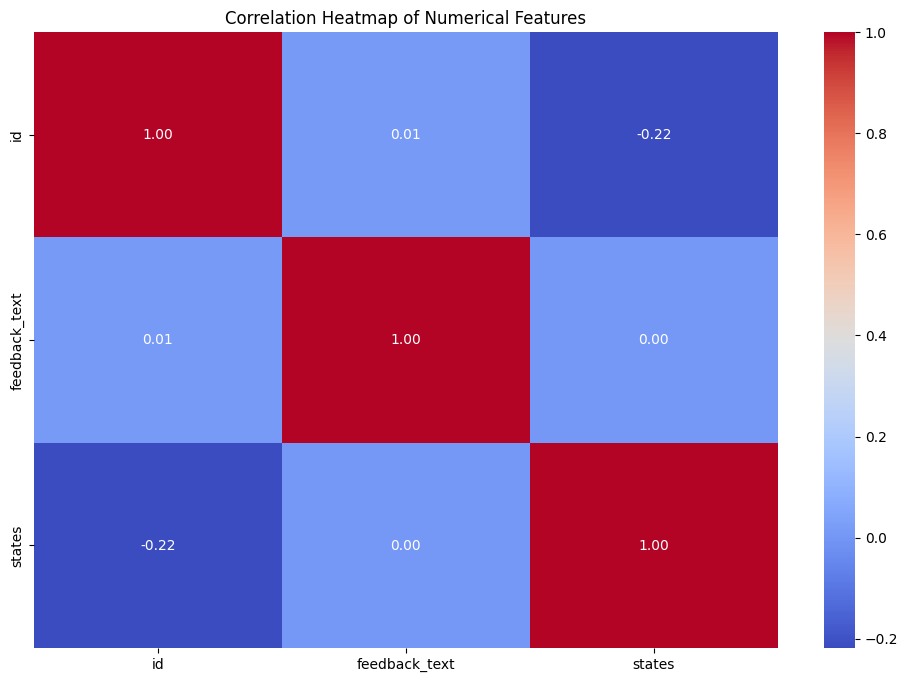

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
if 'CategoryColumn' in df_cleaned.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_cleaned, x='CategoryColumn', palette='viridis')
    plt.title("Distribution of CategoryColumn")
    plt.xticks(rotation=45)
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


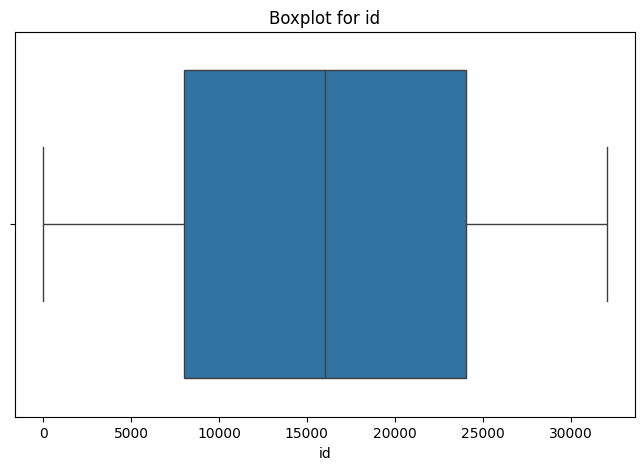

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


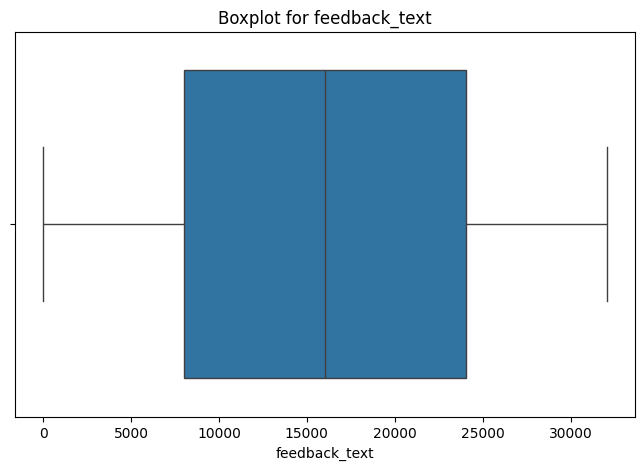

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


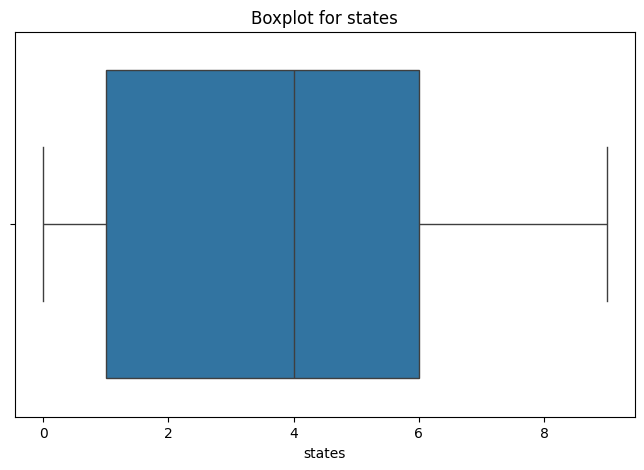

In [ ]:
for column in df_cleaned.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_cleaned[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

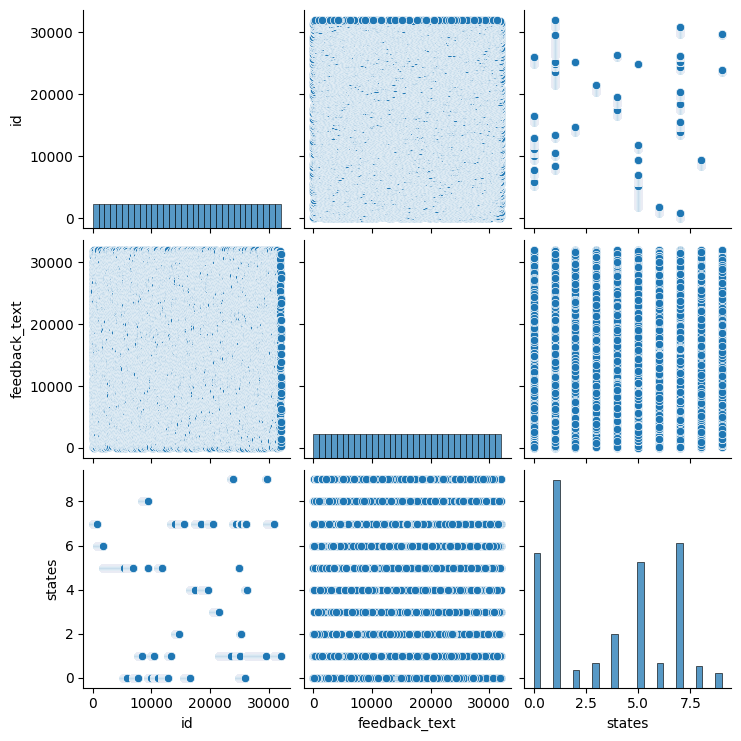

In [ ]:
sns.pairplot(df_cleaned.select_dtypes(include=['float64', 'int64']))
plt.show()

In [ ]:
cleaned_file_path = '/content/products done.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
file_path = '/content/Customer.csv'
df = pd.read_csv(file_path)


In [ ]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   id   feedback_text states
0   1    Archer White  Texas
1   2  Logan Bradford  Texas
2   3    Lily Ramirez  Texas
3   4    Jasper Scott  Texas
4   5  Nicholas Jones  Texas


In [ ]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32053 entries, 0 to 32052
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             32053 non-null  int64 
 1   feedback_text  32053 non-null  object
 2   states         32053 non-null  object
dtypes: int64(1), object(2)
memory usage: 751.4+ KB


In [ ]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
id               0
feedback_text    0
states           0
dtype: int64


In [ ]:
print("\nNumber of duplicate rows before cleaning:", df.duplicated().sum())
df_cleaned = df.drop_duplicates()
print("Number of duplicate rows after cleaning:", df_cleaned.duplicated().sum())


Number of duplicate rows before cleaning: 0
Number of duplicate rows after cleaning: 0


In [ ]:
threshold = len(df_cleaned) * 0.5
df_cleaned = df_cleaned.dropna(thresh=threshold, axis=1)


In [ ]:
for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mean())


In [ ]:
for column in df_cleaned.select_dtypes(include=['object']).columns:
    if df_cleaned[column].mode().size > 0:
        df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mode()[0])


In [ ]:
z_scores = np.abs(stats.zscore(df_cleaned.select_dtypes(include=['float64', 'int64'])))
outliers = (z_scores > 3).any(axis=1)
print(f"\nNumber of outliers detected: {outliers.sum()}")



Number of outliers detected: 0


In [ ]:
df_cleaned = df_cleaned[~outliers]


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df_cleaned.select_dtypes(include=['object']):
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])
    label_encoders[column] = le

In [ ]:
print("\nMissing values after preprocessing:")
print(df_cleaned.isnull().sum())

print("\nNumber of duplicates after preprocessing:", df_cleaned.duplicated().sum())


Missing values after preprocessing:
id               0
feedback_text    0
states           0
dtype: int64

Number of duplicates after preprocessing: 0


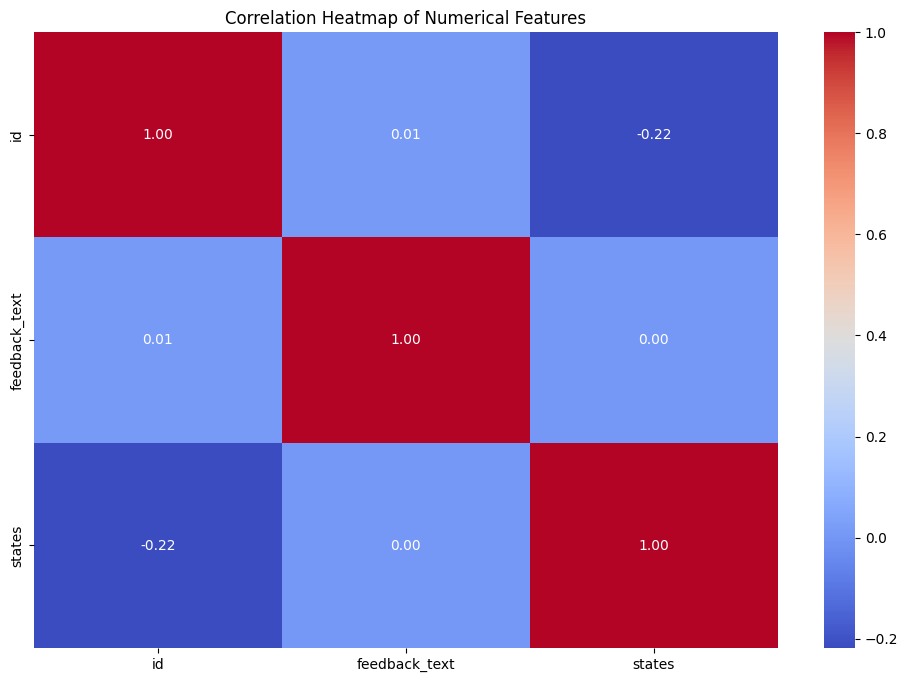

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
if 'CategoryColumn' in df_cleaned.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_cleaned, x='CategoryColumn', palette='viridis')
    plt.title("Distribution of CategoryColumn")
    plt.xticks(rotation=45)
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


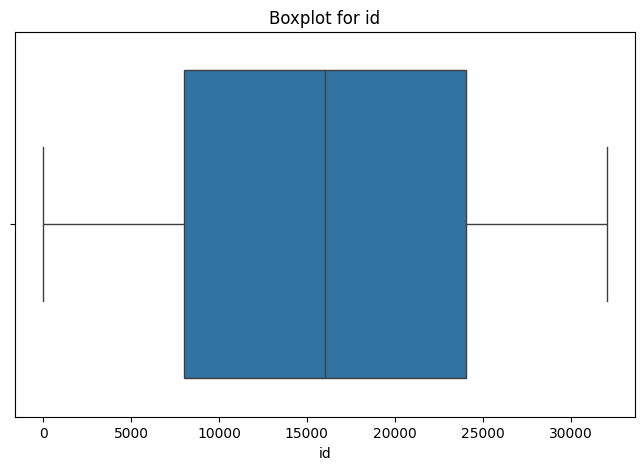

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


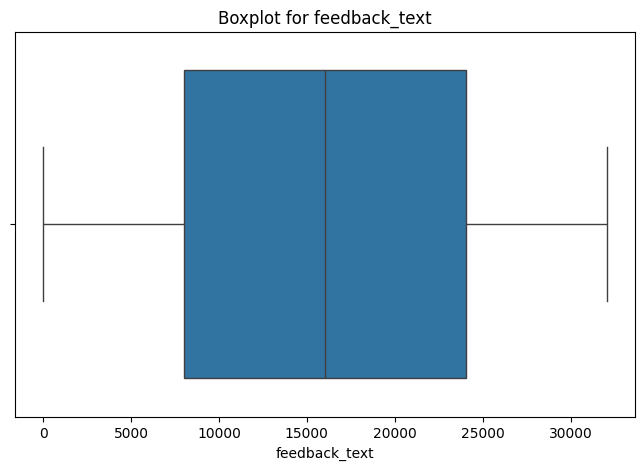

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


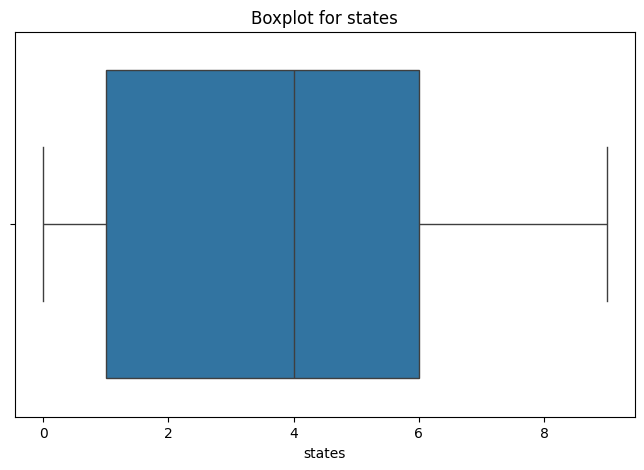

In [ ]:
for column in df_cleaned.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_cleaned[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

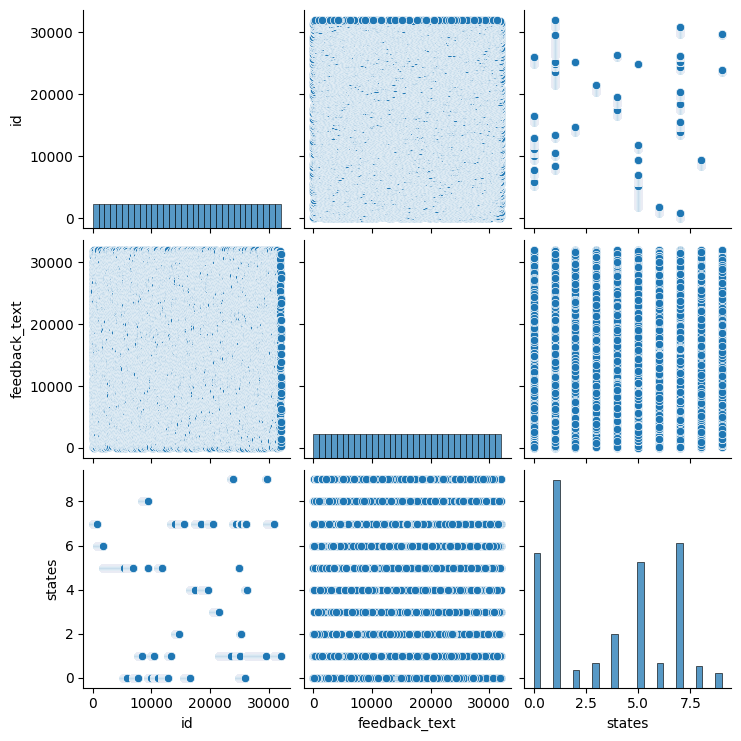

In [ ]:
sns.pairplot(df_cleaned.select_dtypes(include=['float64', 'int64']))
plt.show()

In [ ]:
cleaned_file_path = '/content/customer done.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned data saved to: {cleaned_file_path}")


Cleaned data saved to: /content/customer done.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [ ]:
file_path = '/content/order_details.csv'
df = pd.read_csv(file_path)

In [ ]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   order_id  product_id  quantity
0         1          40         4
1         2          24         4
2         3           5         6
3         3          23         3
4         4          19        10


In [ ]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96302 entries, 0 to 96301
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   order_id    96302 non-null  int64
 1   product_id  96302 non-null  int64
 2   quantity    96302 non-null  int64
dtypes: int64(3)
memory usage: 2.2 MB


In [ ]:
print("\nNumber of duplicate rows before cleaning:", df.duplicated().sum())
df_cleaned = df.drop_duplicates()
print("Number of duplicate rows after cleaning:", df_cleaned.duplicated().sum())


Number of duplicate rows before cleaning: 0
Number of duplicate rows after cleaning: 0


In [ ]:
print("\nMissing values in each column:")
print(df_cleaned.isnull().sum())


Missing values in each column:
order_id      0
product_id    0
quantity      0
dtype: int64


In [ ]:
threshold = len(df_cleaned) * 0.5
df_cleaned = df_cleaned.dropna(thresh=threshold, axis=1)

In [ ]:
for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    mean_value = df_cleaned[column].mean()
    df_cleaned[column] = df_cleaned[column].fillna(mean_value)

In [ ]:
for column in df_cleaned.select_dtypes(include=['object']).columns:
    if not df_cleaned[column].mode().empty:  # Check if the mode exists
        mode_value = df_cleaned[column].mode()[0]  # Get the first mode value
        df_cleaned[column] = df_cleaned[column].fillna(mode_value)  # Fill NaN with mode


In [ ]:
z_scores = np.abs(stats.zscore(df_cleaned.select_dtypes(include=['float64', 'int64'])))
outliers_zscore = (z_scores > 3).any(axis=1)
print(f"\nNumber of outliers detected using Z-score: {outliers_zscore.sum()}")


Number of outliers detected using Z-score: 0


In [ ]:
df_cleaned_zscore = df_cleaned[~outliers_zscore]

In [ ]:
Q1 = df_cleaned.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = df_cleaned.select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df_cleaned.select_dtypes(include=['float64', 'int64']) < (Q1 - 1.5 * IQR)) |
               (df_cleaned.select_dtypes(include=['float64', 'int64']) > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"\nNumber of outliers detected using IQR: {outliers_iqr.sum()}")


Number of outliers detected using IQR: 0


In [ ]:
df_cleaned_iqr = df_cleaned[~outliers_iqr]

In [ ]:
scaler = StandardScaler()  # Optionally use MinMaxScaler() for normalization
df_cleaned_scaled = df_cleaned.copy()
df_cleaned_scaled[df_cleaned.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df_cleaned.select_dtypes(include=['float64', 'int64']))


In [ ]:
df_cleaned_encoded = pd.get_dummies(df_cleaned, drop_first=True)

In [ ]:
print("\nSummary statistics after cleaning:")
print(df_cleaned.describe())


Summary statistics after cleaning:
           order_id    product_id      quantity
count  96302.000000  96302.000000  96302.000000
mean   16030.517206     21.562065      5.498733
std     9261.529302     12.108374      2.880440
min        1.000000      1.000000      1.000000
25%     8030.000000     11.000000      3.000000
50%    16065.000000     22.000000      6.000000
75%    24038.000000     32.000000      8.000000
max    32053.000000     42.000000     10.000000


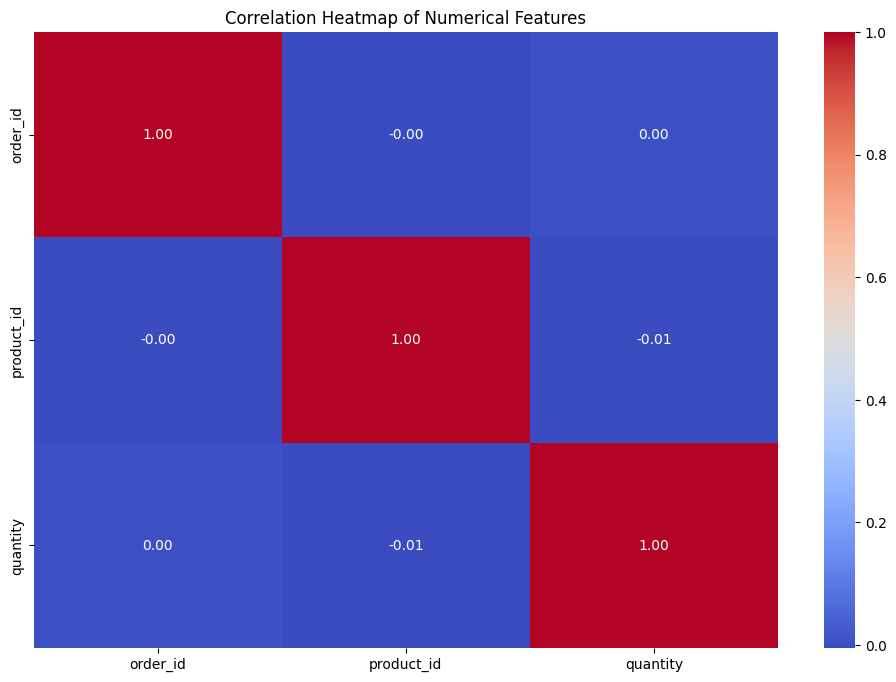

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


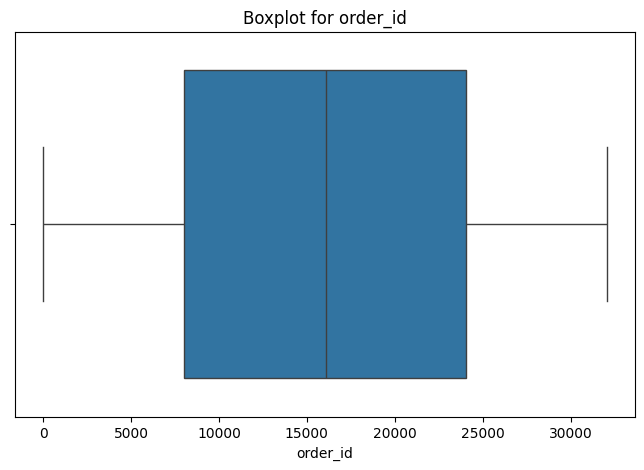

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


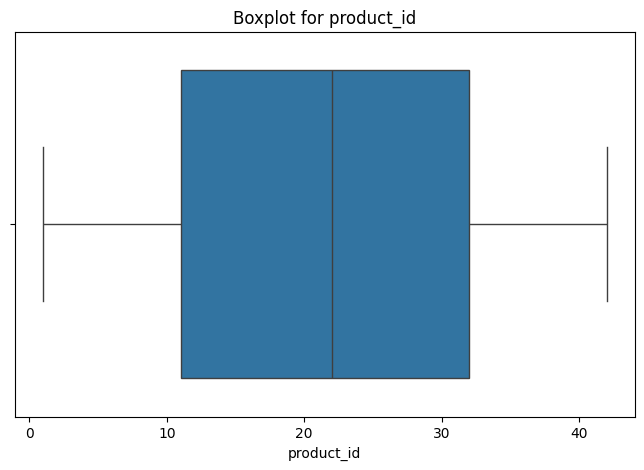

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


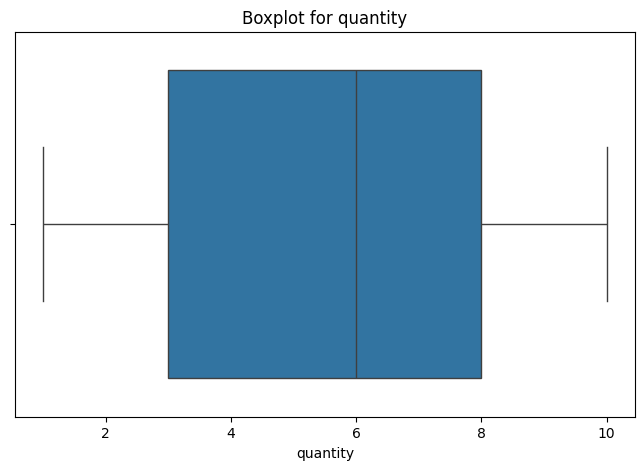

In [ ]:
for column in df_cleaned.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_cleaned[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

In [ ]:
if 'CategoryColumn' in df_cleaned.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_cleaned, x='CategoryColumn', palette='viridis')
    plt.title("Distribution of CategoryColumn")
    plt.xticks(rotation=45)
    plt.show()

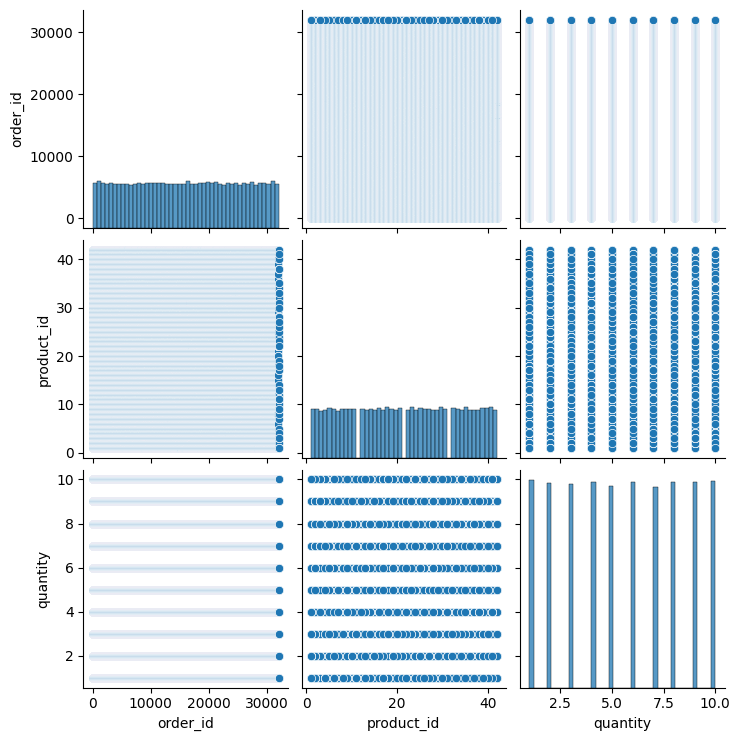

In [ ]:
sns.pairplot(df_cleaned.select_dtypes(include=['float64', 'int64']))
plt.show()

In [ ]:
cleaned_file_path = '/content/order_details done.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned data saved to: {cleaned_file_path}")


Cleaned data saved to: /content/order_details done.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the CSV file
file_path = '/content/Store_edit.csv'  # Replace with the path to your file
data = pd.read_csv(file_path)

In [ ]:
# Display the first few rows
print("First few rows of the data:")
print(data.head())

First few rows of the data:
   id   latitude  longitude  rating_count  \
0   1  30.460718 -97.792874          1240   
1   2  40.922081 -75.399919          1028   
2   3  40.727401 -73.812460          2193   
3   4  40.750506 -73.990583          2052   
4   5  40.729126 -73.993264          1670   

                                       store_address  
0     13749 US-183 Hwy Austin TX 78750 United States  
1  1698 US-209 Brodheadsville PA 18322 United States  
2   72-69 Kissena Blvd Queens NY 11367 United States  
3        429 7th Ave New York NY 10001 United States  
4       724 Broadway New York NY 10003 United States  


In [ ]:
# 1. Remove Duplicates
print("\nNumber of duplicate rows before removing:", data.duplicated().sum())
data = data.drop_duplicates()
print("Number of duplicate rows after removing:", data.duplicated().sum())


Number of duplicate rows before removing: 0
Number of duplicate rows after removing: 0


In [ ]:
# 2. Handle Missing Values
print("\nMissing values before imputation:")
print(data.isnull().sum())


Missing values before imputation:
id               0
latitude         0
longitude        0
rating_count     0
store_address    0
dtype: int64


In [ ]:
# Fill missing values (numerical columns) with the median
data.fillna(data.median(numeric_only=True), inplace=True)

In [ ]:
for col in data.select_dtypes(include='object').columns:
    if not data[col].mode().empty:
        mode_value = data[col].mode()[0]
        data[col] = data[col].fillna(mode_value)

print("Missing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
id               0
latitude         0
longitude        0
rating_count     0
store_address    0
dtype: int64


In [ ]:
def detect_outliers(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
    outliers = (z_scores > threshold)
    return np.where(outliers)

In [ ]:
outliers = detect_outliers(data)
print("\nOutliers found at indices:", outliers)


Outliers found at indices: (array([21]), array([3]))


In [ ]:
# You can remove outliers based on the index
data_cleaned = data[(np.abs(stats.zscore(data.select_dtypes(include=np.number))) < 3).all(axis=1)]
print("Shape of data after removing outliers:", data_cleaned.shape)

Shape of data after removing outliers: (36, 5)


In [ ]:
# Assuming 'numerical_columns' is a list of the numerical column names
data_cleaned.loc[:, numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])


<ipython-input-97-f4d95e4836f4>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.65703583 -1.56455011 -1.47206439 -1.37957867 -1.28709295 -1.19460723
 -1.10212151 -1.00963579 -0.91715006 -0.82466434 -0.73217862 -0.6396929
 -0.54720718 -0.45472146 -0.36223574 -0.26975002 -0.1772643  -0.08477858
  0.00770714  0.10019286  0.19267859  0.37765003  0.47013575  0.56262147
  0.65510719  0.74759291  0.84007863  0.93256435  1.02505007  1.11753579
  1.21002151  1.30250723  1.39499296  1.48747868  1.5799644   1.67245012]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_cleaned.loc[:, numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])
<ipython-input-97-f4d95e4836f4>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.72574001 -0.88111176 -0.02729999 -0.13063687 -0.41059918  2.1662267

<Figure size 1000x600 with 0 Axes>

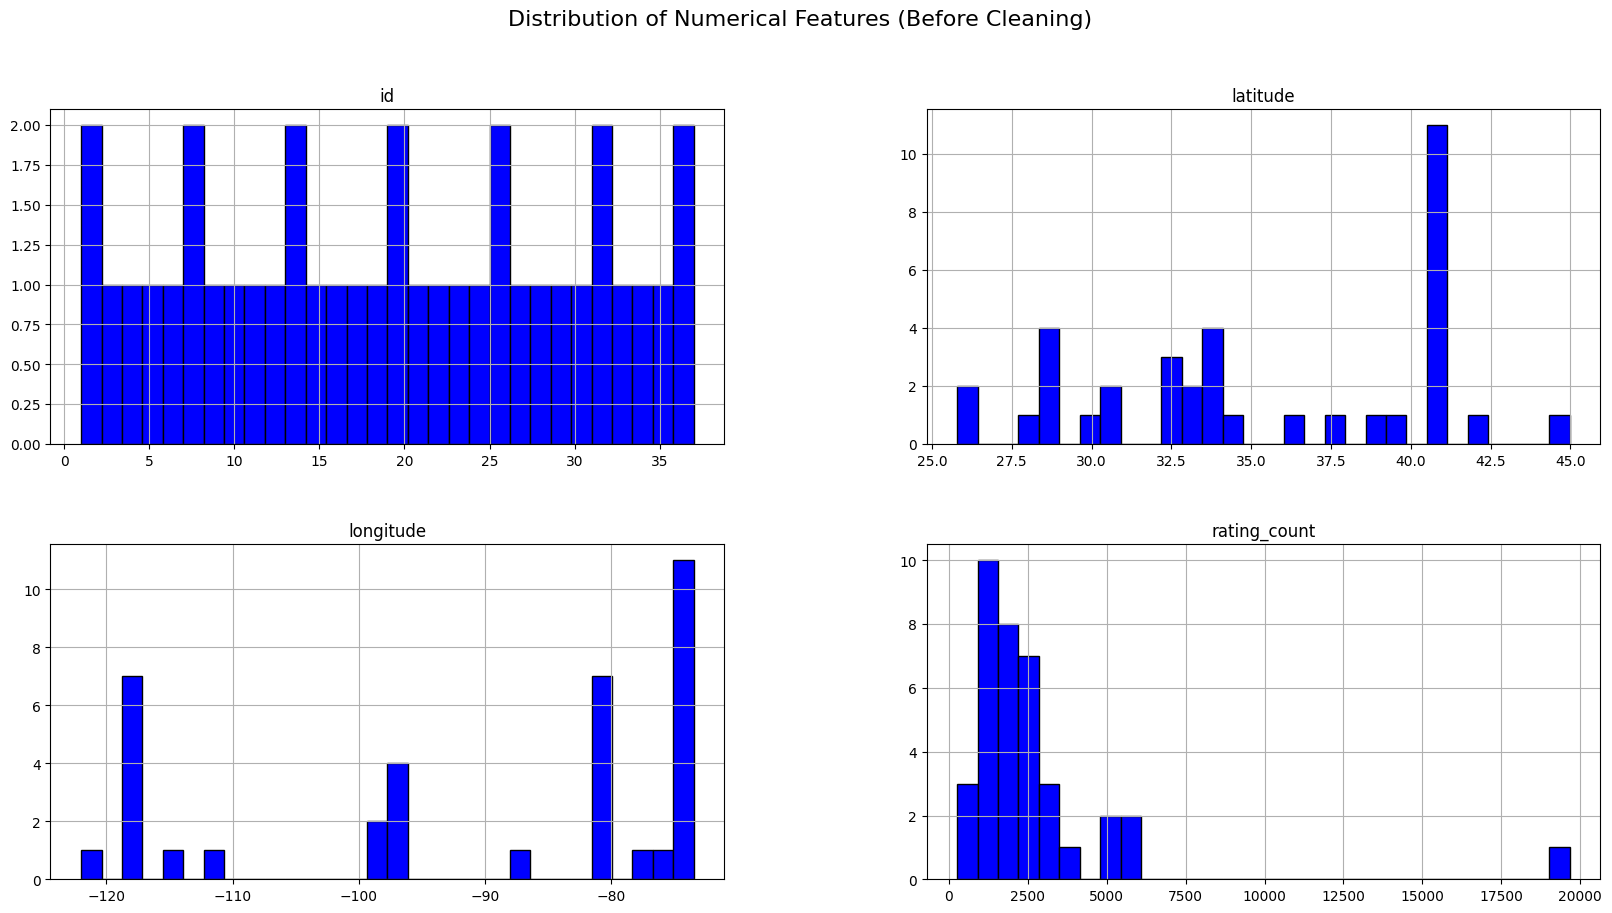

In [ ]:
plt.figure(figsize=(10, 6))
data.hist(bins=30, figsize=(20, 10), color='blue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features (Before Cleaning)', fontsize=16)
plt.show()

<Figure size 1000x600 with 0 Axes>

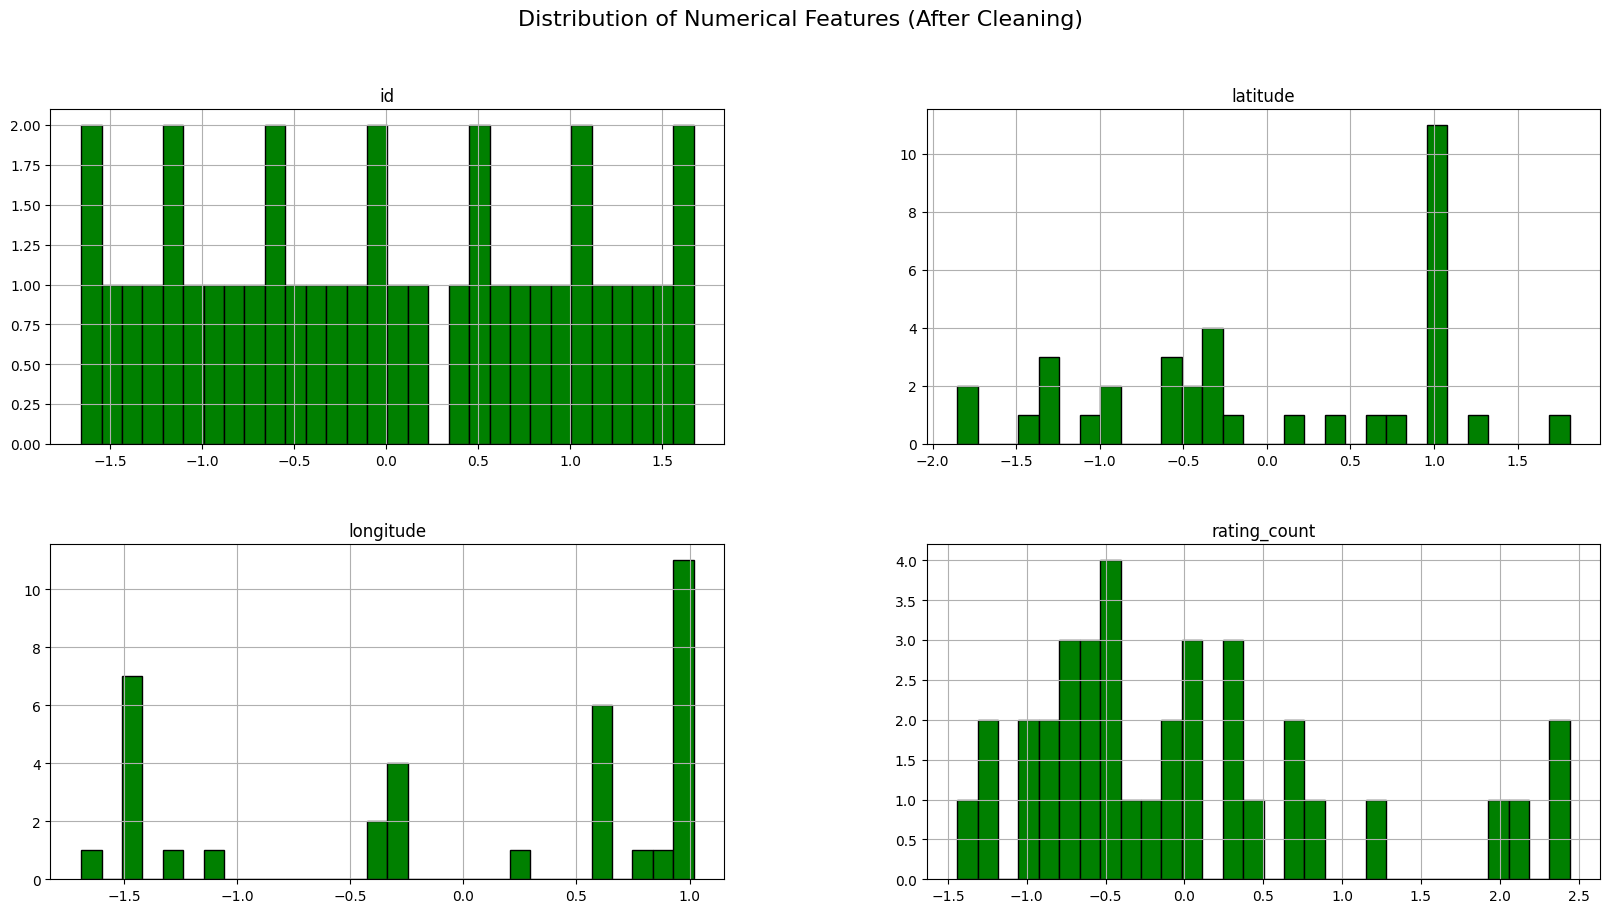

In [ ]:
plt.figure(figsize=(10, 6))
data_cleaned.hist(bins=30, figsize=(20, 10), color='green', edgecolor='black')
plt.suptitle('Distribution of Numerical Features (After Cleaning)', fontsize=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

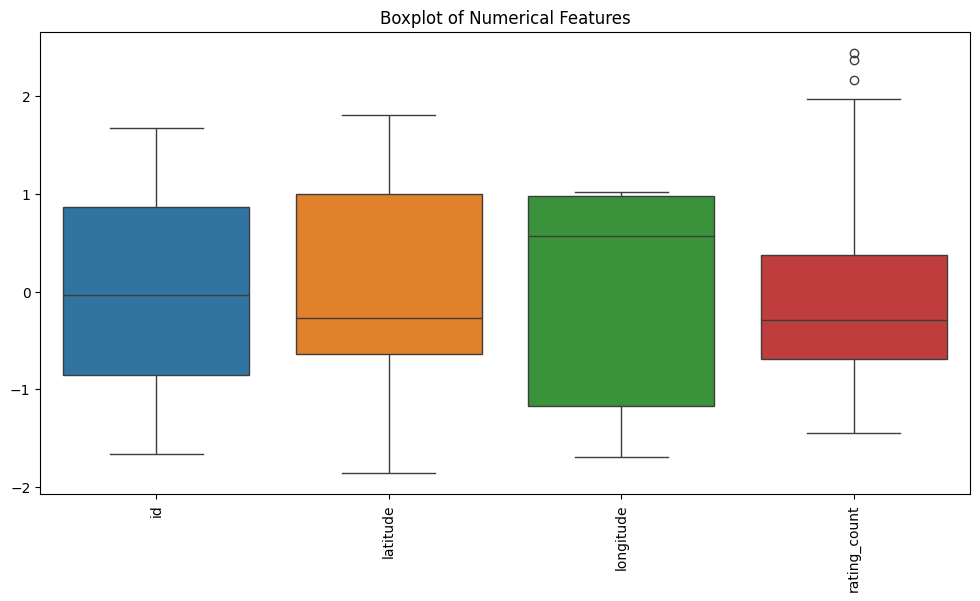

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned)
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

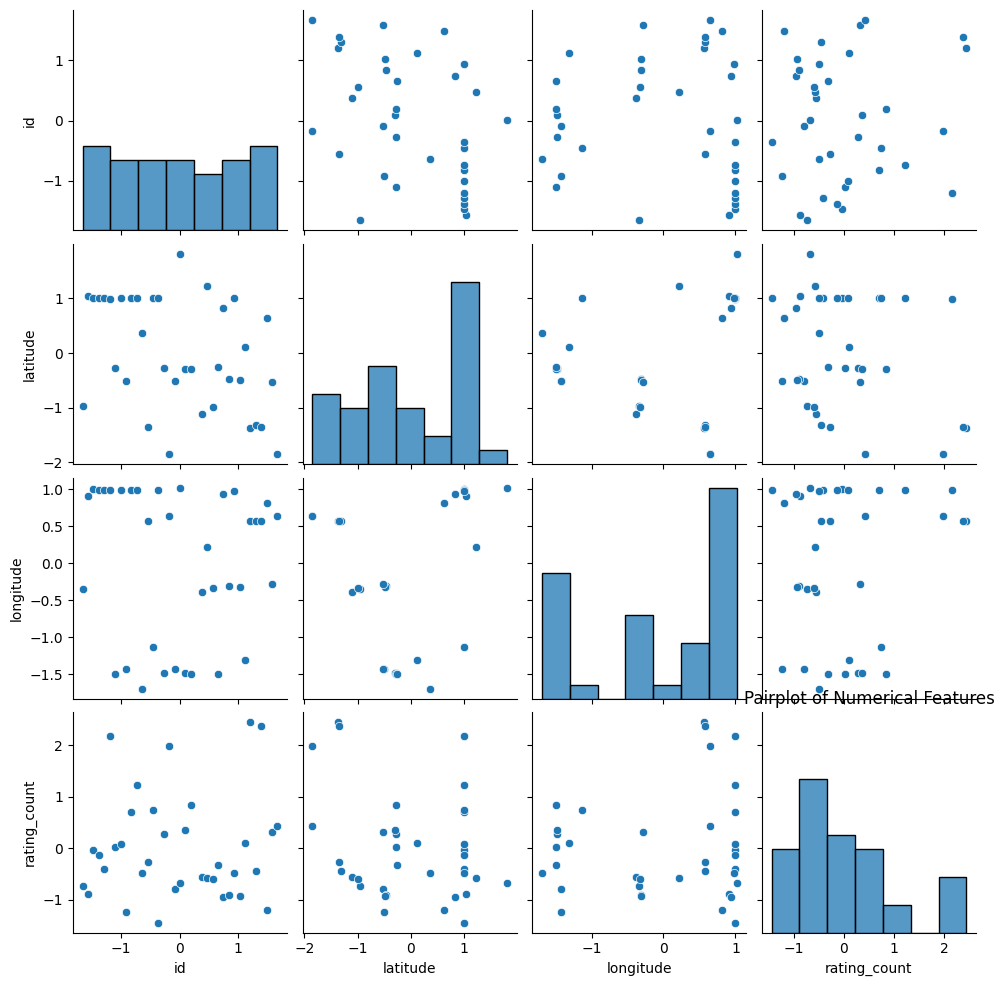

In [ ]:
sns.pairplot(data_cleaned)
plt.title("Pairplot of Numerical Features")
plt.show()

In [ ]:
output_path = 'Processed_Store_Data done.csv'
data_cleaned.to_csv(output_path, index=False)
print(f"Data cleaning complete. Cleaned data saved to '{output_path}'.")

Data cleaning complete. Cleaned data saved to 'Processed_Store_Data done.csv'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [ ]:
file_path = '/content/sales.csv'
data = pd.read_csv(file_path)

In [ ]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   id                        date  customer_id  store_id
0   1  2024-06-28 00:25:26.296833            1        28
1   2  2020-10-22 00:25:26.296833            2        29
2   3  2023-10-23 00:25:26.296833            3        21
3   4  2024-07-03 00:25:26.296833            4         5
4   5  2022-01-14 00:25:26.296833            5        14


In [ ]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32053 entries, 0 to 32052
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           32053 non-null  int64 
 1   date         32053 non-null  object
 2   customer_id  32053 non-null  int64 
 3   store_id     32053 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1001.8+ KB
None


In [ ]:
print("\nStatistical summary of the dataset:")
print(data.describe())


Statistical summary of the dataset:
                 id   customer_id      store_id
count  32053.000000  32053.000000  32053.000000
mean   16027.000000  16027.000000     25.620441
std     9253.048426   9253.048426     14.437699
min        1.000000      1.000000      1.000000
25%     8014.000000   8014.000000     13.000000
50%    16027.000000  16027.000000     26.000000
75%    24040.000000  24040.000000     38.000000
max    32053.000000  32053.000000     50.000000


In [ ]:
print("\nNumber of duplicate rows before removing:", data.duplicated().sum())
data = data.drop_duplicates()
print("Number of duplicate rows after removing:", data.duplicated().sum())


Number of duplicate rows before removing: 0
Number of duplicate rows after removing: 0


In [ ]:
print("\nMissing values before imputation:")
print(data.isnull().sum())


Missing values before imputation:
id             0
date           0
customer_id    0
store_id       0
dtype: int64


In [ ]:
data.fillna(data.median(numeric_only=True), inplace=True)

In [ ]:
for col in data.select_dtypes(include='object').columns:
    mode_value = data[col].mode()[0]  # Get the mode of the column
    data[col] = data[col].fillna(mode_value)  # Assign the filled column back to the DataFrame


In [ ]:
print("Missing values after imputation:")
print(data.isnull().sum())

Missing values after imputation:
id             0
date           0
customer_id    0
store_id       0
dtype: int64


In [ ]:
def detect_outliers(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
    outliers = (z_scores > threshold)
    return np.where(outliers)

In [ ]:
outliers = detect_outliers(data)
print("\nOutliers found at indices:", outliers)


Outliers found at indices: (array([], dtype=int64), array([], dtype=int64))


In [ ]:
data_cleaned = data[(np.abs(stats.zscore(data.select_dtypes(include=np.number))) < 3).all(axis=1)]
print("Shape of data after removing outliers:", data_cleaned.shape)

Shape of data after removing outliers: (32053, 4)


In [ ]:
scaler = StandardScaler()
numerical_columns = data_cleaned.select_dtypes(include=np.number).columns
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])


<Figure size 1000x600 with 0 Axes>

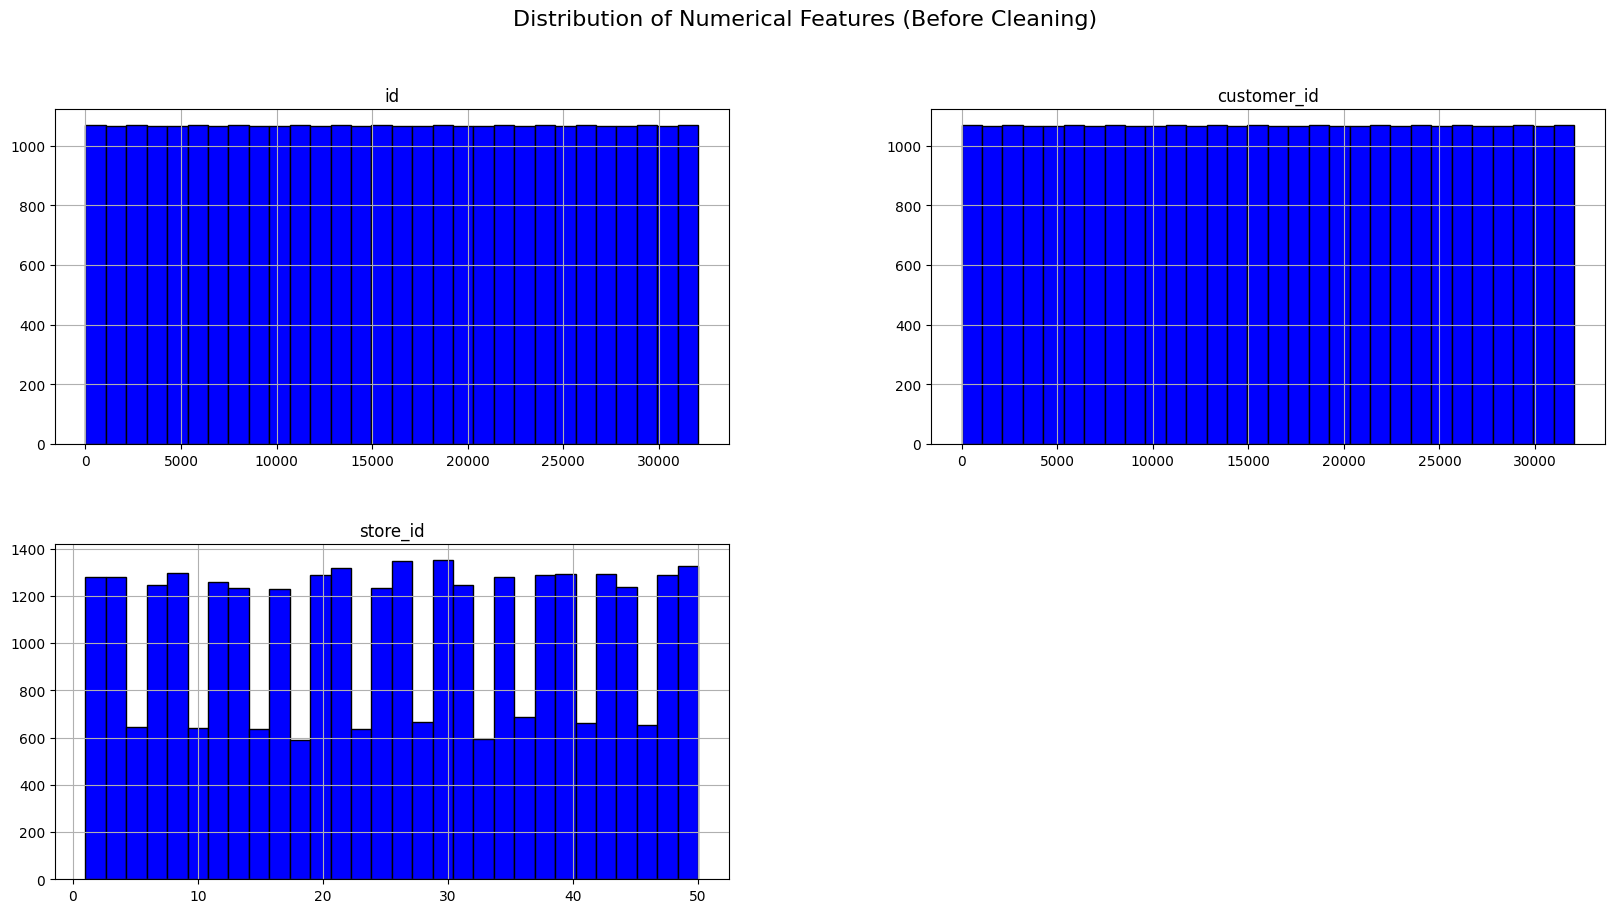

In [ ]:
plt.figure(figsize=(10, 6))
data.hist(bins=30, figsize=(20, 10), color='blue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features (Before Cleaning)', fontsize=16)
plt.show()

<Figure size 1000x600 with 0 Axes>

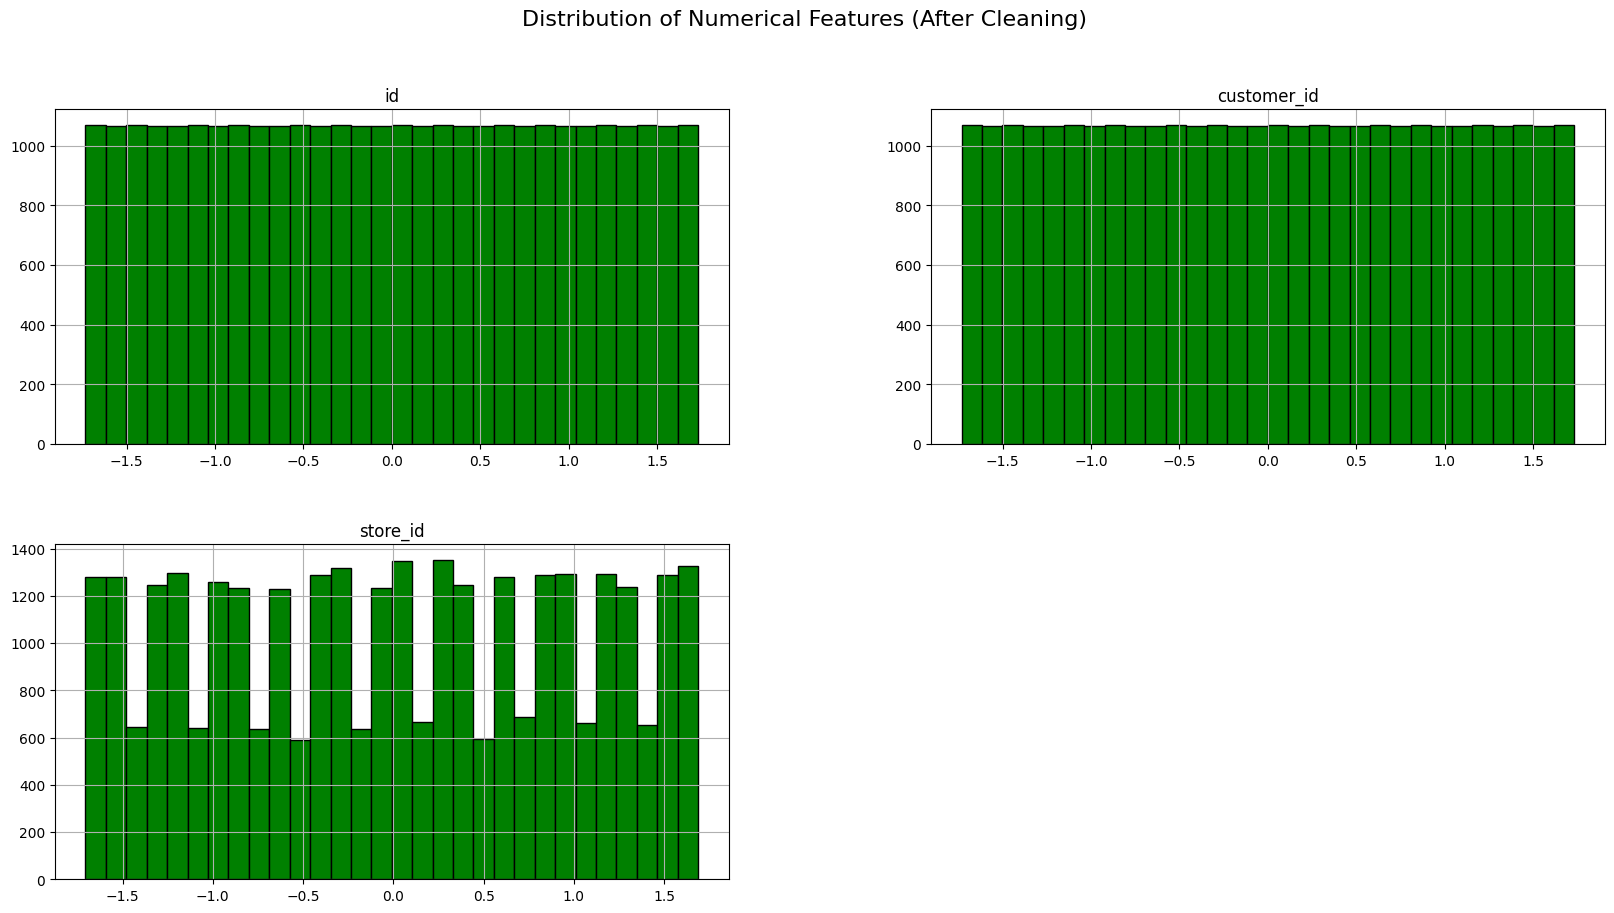

In [ ]:
plt.figure(figsize=(10, 6))
data_cleaned.hist(bins=30, figsize=(20, 10), color='green', edgecolor='black')
plt.suptitle('Distribution of Numerical Features (After Cleaning)', fontsize=16)
plt.show()

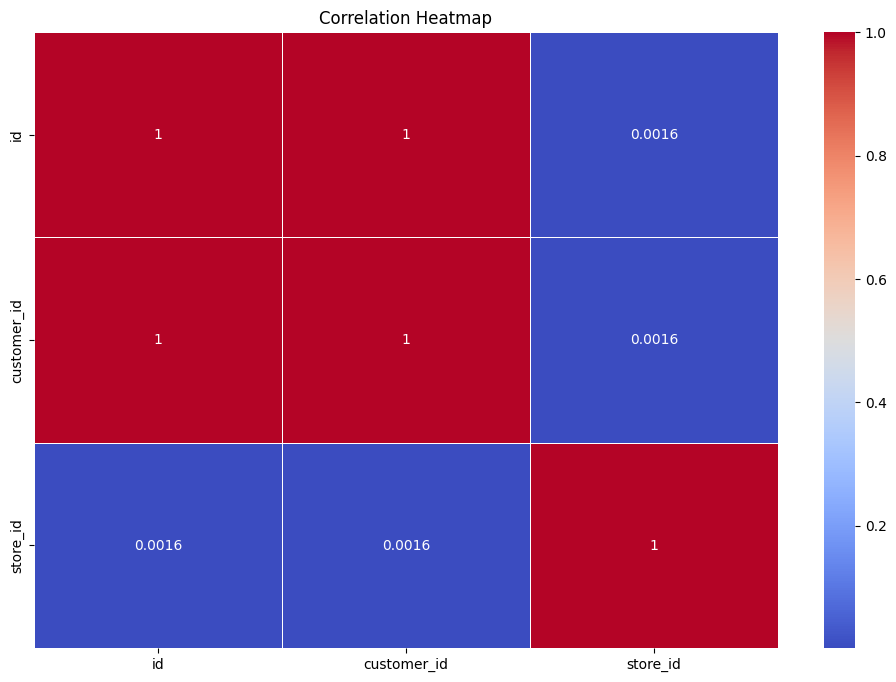

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = pd.DataFrame(data_cleaned, columns=numerical_columns).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

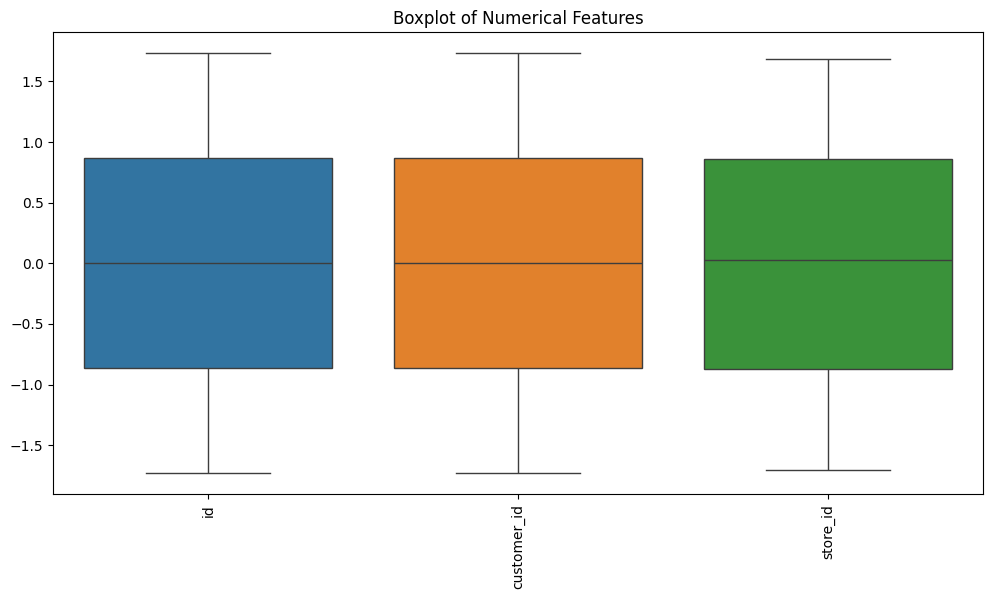

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.DataFrame(data_cleaned, columns=numerical_columns))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

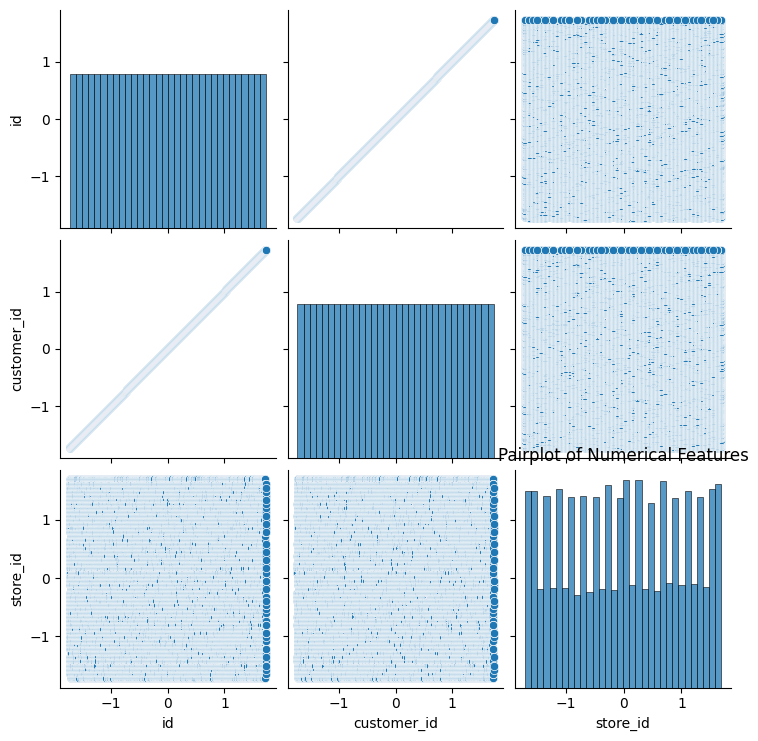

In [ ]:
sns.pairplot(pd.DataFrame(data_cleaned, columns=numerical_columns))
plt.title("Pairplot of Numerical Features")
plt.show()

In [ ]:
output_path = 'sales_Data done.csv'
pd.DataFrame(data_cleaned, columns=data.columns).to_csv(output_path, index=False)
print(f"Data cleaning complete. Cleaned data saved to '{output_path}'.")


Data cleaning complete. Cleaned data saved to 'sales_Data done.csv'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [ ]:
file_path = '/content/final_Date.csv'  # Path to your file
data = pd.read_csv(file_path)

In [ ]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   id  customer_id  store_id   full_date  year  month  day
0   1            1        28  2023-08-25  2023      8   25
1   2            2        29  2023-08-25  2023      8   25
2   3            3        21  2023-08-25  2023      8   25
3   4            4         5  2023-08-25  2023      8   25
4   5            5        14  2023-08-25  2023      8   25


In [ ]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32053 entries, 0 to 32052
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           32053 non-null  int64 
 1   customer_id  32053 non-null  int64 
 2   store_id     32053 non-null  int64 
 3   full_date    32053 non-null  object
 4   year         32053 non-null  int64 
 5   month        32053 non-null  int64 
 6   day          32053 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.7+ MB
None


In [ ]:
print("\nStatistical summary of the dataset:")
print(data.describe())


Statistical summary of the dataset:
                 id   customer_id      store_id     year    month      day
count  32053.000000  32053.000000  32053.000000  32053.0  32053.0  32053.0
mean   16027.000000  16027.000000     25.620441   2023.0      8.0     25.0
std     9253.048426   9253.048426     14.437699      0.0      0.0      0.0
min        1.000000      1.000000      1.000000   2023.0      8.0     25.0
25%     8014.000000   8014.000000     13.000000   2023.0      8.0     25.0
50%    16027.000000  16027.000000     26.000000   2023.0      8.0     25.0
75%    24040.000000  24040.000000     38.000000   2023.0      8.0     25.0
max    32053.000000  32053.000000     50.000000   2023.0      8.0     25.0


In [ ]:
print("\nNumber of duplicate rows before removing:", data.duplicated().sum())
data = data.drop_duplicates()
print("Number of duplicate rows after removing:", data.duplicated().sum())



Number of duplicate rows before removing: 0
Number of duplicate rows after removing: 0


In [ ]:
print("\nMissing values before handling:")
print(data.isnull().sum())


Missing values before handling:
id             0
customer_id    0
store_id       0
full_date      0
year           0
month          0
day            0
dtype: int64


In [ ]:
data.fillna(data.median(numeric_only=True), inplace=True)


In [ ]:
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].fillna(data[col].mode()[0])


In [ ]:
print("Missing values after handling:")
print(data.isnull().sum())

Missing values after handling:
id             0
customer_id    0
store_id       0
full_date      0
year           0
month          0
day            0
dtype: int64


In [ ]:
def detect_outliers(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
    outliers = (z_scores > threshold)
    return np.where(outliers)

In [ ]:
outliers = detect_outliers(data)
print("\nOutliers found at indices:", outliers)


Outliers found at indices: (array([], dtype=int64), array([], dtype=int64))


In [ ]:
data_cleaned = data[(np.abs(stats.zscore(data.select_dtypes(include=np.number))) < 3).all(axis=1)]
print("Shape of data after removing outliers:", data_cleaned.shape)


Shape of data after removing outliers: (0, 7)


<Figure size 1000x600 with 0 Axes>

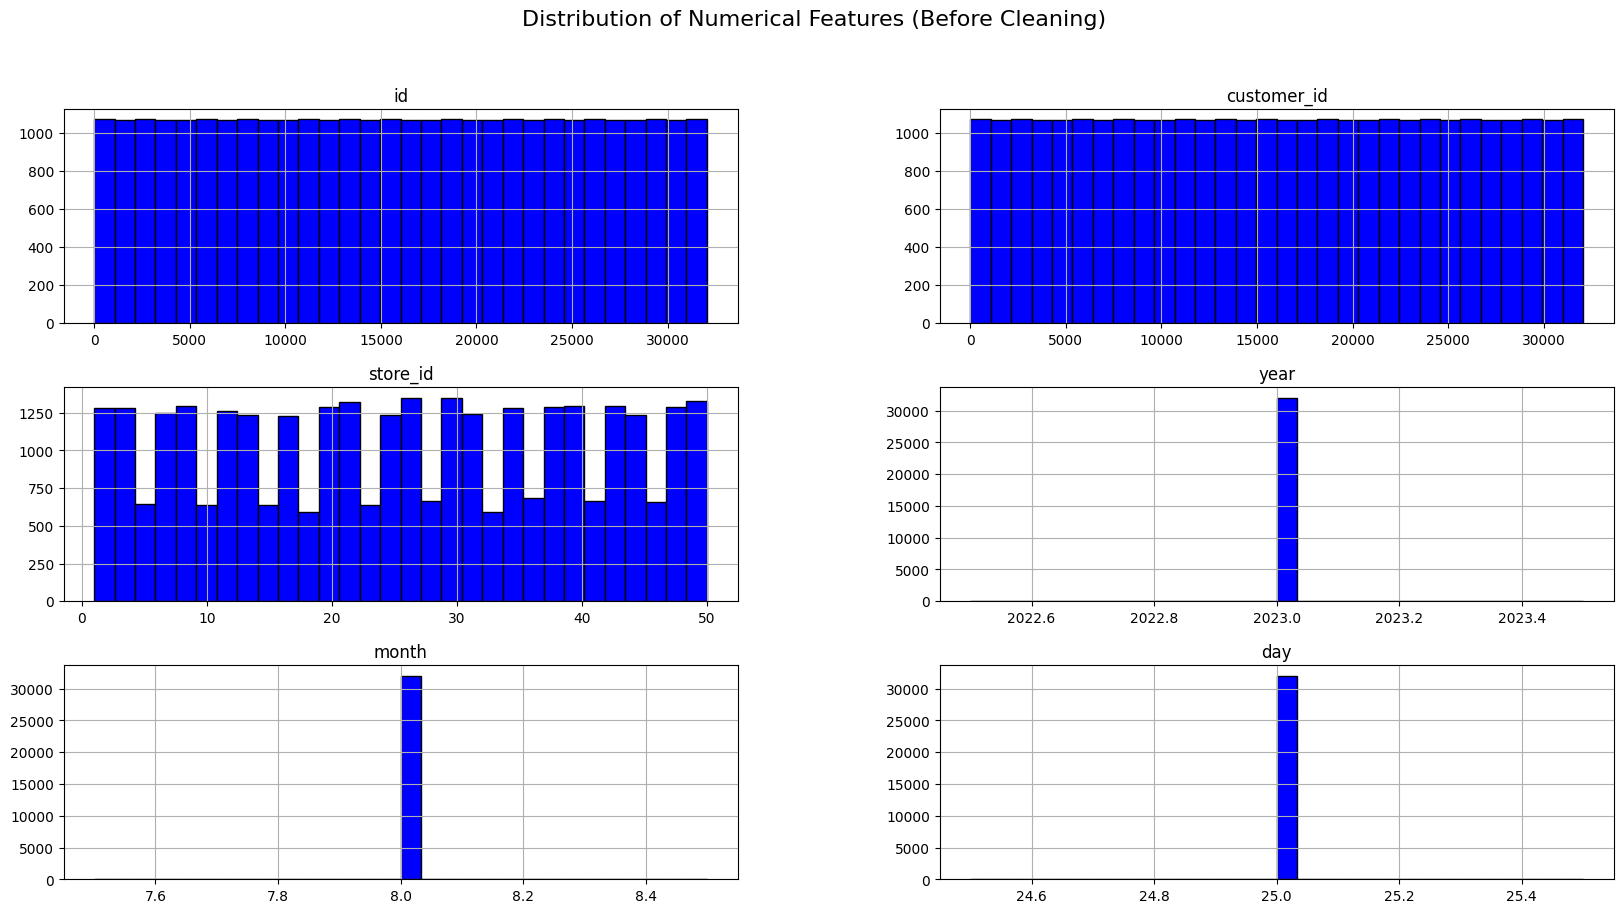

In [ ]:
plt.figure(figsize=(10, 6))
data.hist(bins=30, figsize=(20, 10), color='blue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features (Before Cleaning)', fontsize=16)
plt.show()

In [ ]:
output_path = 'Processed_final_Date done.csv'
pd.DataFrame(data_cleaned, columns=data.columns).to_csv(output_path, index=False)
print(f"Data cleaning complete. Cleaned data saved to '{output_path}'.")

Data cleaning complete. Cleaned data saved to 'Processed_final_Date done.csv'.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats

In [2]:
file_path = '/content/Feedback_cleaned2.csv'
df = pd.read_csv(file_path)


In [3]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   id  customer_id  store_id  order_id  \
0   1            1         1         1   
1   2            2         1         2   
2   3            3         1         3   
3   4            4         1         4   
4   5            5         1         5   

                                              review  rating  
0  Why does it look like someone spit on my food?...       1  
1  It'd McDonalds. It is what it is as far as the...       4  
2  Made a mobile order got to the speaker and che...       1  
3  My mc. Crispy chicken sandwich was ???????????...       5  
4  I repeat my order 3 times in the drive thru an...       1  


In [4]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32053 entries, 0 to 32052
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           32053 non-null  int64 
 1   customer_id  32053 non-null  int64 
 2   store_id     32053 non-null  int64 
 3   order_id     32053 non-null  int64 
 4   review       32053 non-null  object
 5   rating       32053 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 1.5+ MB


In [5]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
id             0
customer_id    0
store_id       0
order_id       0
review         0
rating         0
dtype: int64


In [6]:
print("\nNumber of duplicate rows before removal:", df.duplicated().sum())
df_cleaned = df.drop_duplicates()
print("\nNumber of duplicate rows after removal:", df_cleaned.duplicated().sum())


Number of duplicate rows before removal: 0

Number of duplicate rows after removal: 0


In [7]:
threshold = len(df_cleaned) * 0.5
df_cleaned = df_cleaned.dropna(thresh=threshold, axis=1)

In [8]:
for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mean())


In [9]:
for column in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mode()[0])

In [10]:
z_scores = np.abs(stats.zscore(df_cleaned.select_dtypes(include=['float64', 'int64'])))
outliers = (z_scores > 3).any(axis=1)
print(f"\nNumber of outliers detected: {outliers.sum()}")


Number of outliers detected: 0


In [11]:
df_cleaned = df_cleaned[~outliers]


In [12]:
label_encoders = {}
for column in df_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])
    label_encoders[column] = le

In [13]:
print("\nMissing values after preprocessing:")
print(df_cleaned.isnull().sum())

print("\nNumber of duplicates after preprocessing:", df_cleaned.duplicated().sum())


Missing values after preprocessing:
id             0
customer_id    0
store_id       0
order_id       0
review         0
rating         0
dtype: int64

Number of duplicates after preprocessing: 0


In [14]:
print("\nStatistical summary after cleaning:")
print(df_cleaned.describe())


Statistical summary after cleaning:
                 id   customer_id      store_id      order_id        review  \
count  32053.000000  32053.000000  32053.000000  32053.000000  32053.000000   
mean   16027.000000  16027.000000     22.255109  16027.000000   9894.944498   
std     9253.048426   9253.048426     11.304959   9253.048426   6007.198475   
min        1.000000      1.000000      1.000000      1.000000      0.000000   
25%     8014.000000   8014.000000     13.000000   8014.000000   4670.000000   
50%    16027.000000  16027.000000     26.000000  16027.000000   9730.000000   
75%    24040.000000  24040.000000     32.000000  24040.000000  14846.000000   
max    32053.000000  32053.000000     37.000000  32053.000000  21182.000000   

             rating  
count  32053.000000  
mean       3.116307  
std        1.619645  
min        1.000000  
25%        1.000000  
50%        3.000000  
75%        5.000000  
max        5.000000  


In [15]:
cleaned_file_path = '/content/cleaned_feedback done.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned data saved to: {cleaned_file_path}")


Cleaned data saved to: /content/cleaned_feedback done.csv
